In [1]:
%matplotlib inline

# 📚 Basic Libraries
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import http.client
import json
from bs4 import BeautifulSoup
import pandas as pd

import plotly.express as px

In [2]:
data = pd.read_csv('datos_coches_limpios.csv')

In [3]:
data.sample(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,market_price,car age,price
461258,2015,ford,Taurus,Limited,sedan,automatic,tx,44.0,38610.0,red,black,avis budget group,19700.0,1.0,19500.0
237834,2011,general motors,CTS,Premium,sedan,automatic,pa,42.0,43295.0,white,beige,roth cadillac,19800.0,5.0,20600.0
184313,2011,ford,Escape,Limited,suv,automatic,mn,29.0,86555.0,gray,black,jpmorgan chase bank n.a.,10200.0,5.0,11300.0


<h2 style="color: #0000FF;">Distribuciones las variables númericas</h2>

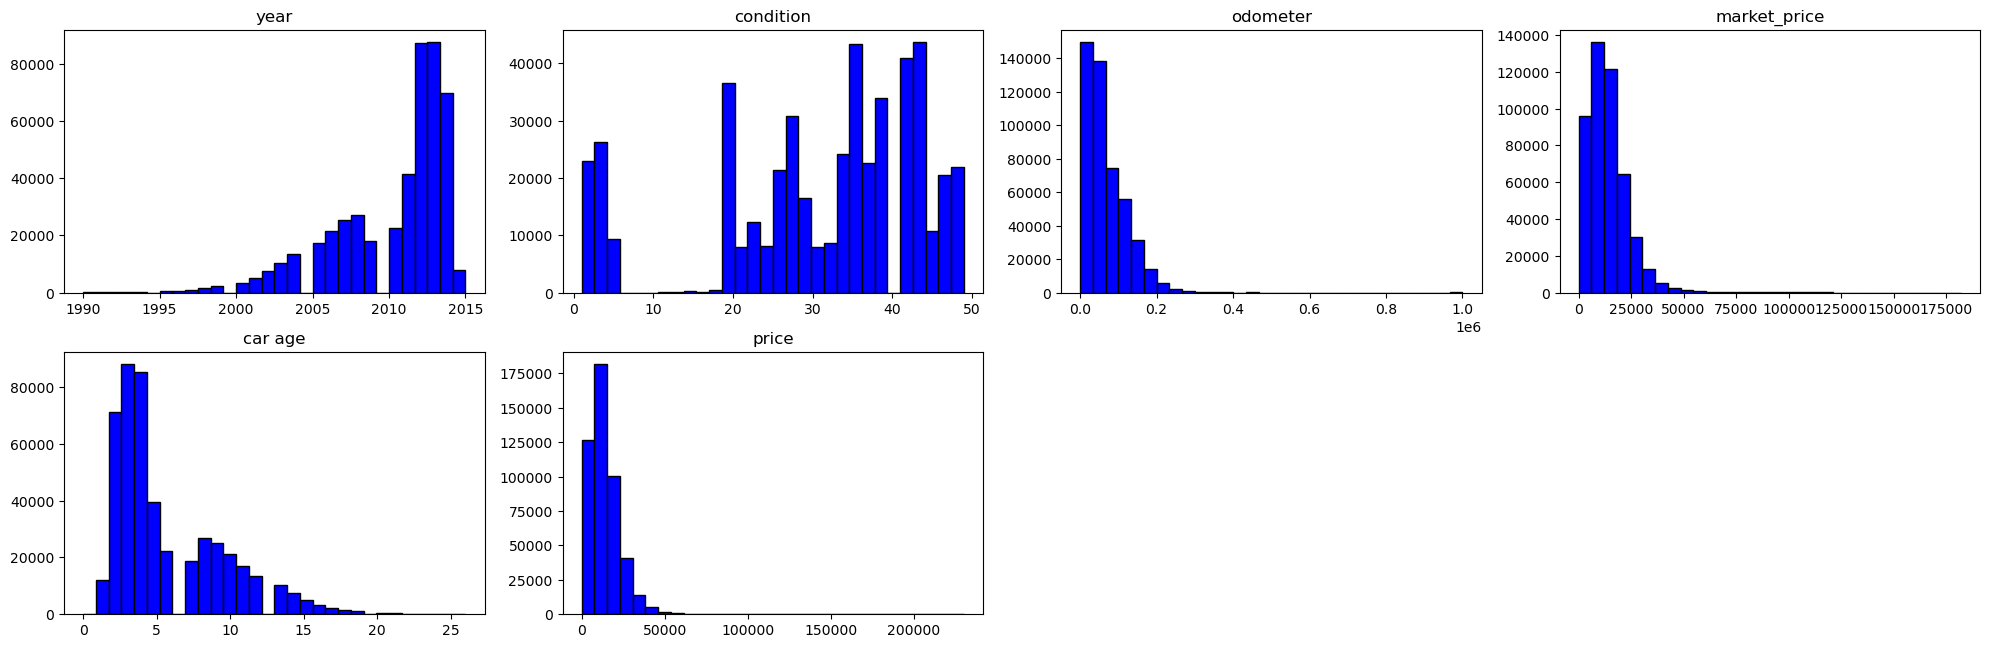

In [4]:
color = '#0000FF'

# grid size
nrows, ncols = 5, 4  # ajusta según tu número de características

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include='number')

# Plotear cada característica numérica
for i, ax in enumerate(axes):
    if i >= len(numeric_data.columns):
        ax.set_visible(False)  # ocultar gráficos no utilizados
        continue
    ax.hist(numeric_data.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(numeric_data.columns[i])

plt.tight_layout()
plt.show()

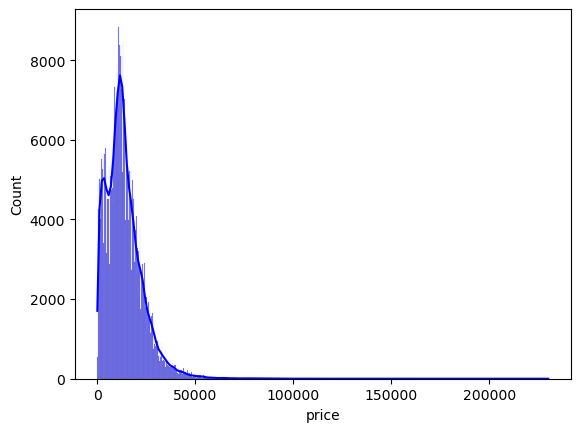

In [5]:
sns.histplot(data["price"], color=color, kde=True);

OPCIÓN LINEAR REGRESSION

In [6]:
numeric_data = data.select_dtypes(include='number')

In [7]:
numeric_data.columns

Index(['year', 'condition', 'odometer', 'market_price', 'car age', 'price'], dtype='object')

<h2 style="color: #0000FF;">00.MACHING LEARNING</h2>

<h2 style="color: #0000FF;">01.Linear Regression</h2>

In [8]:
X = numeric_data.drop('price', axis=1)  
y = numeric_data['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(f'100% of our data: {len(data)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 472325.
80% for training data: 377860.
20% for test data: 94465.


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
predictions = model.predict(X_test)

In [13]:
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [14]:
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.971
RMSE =  1622.7613
The value of the metric MSE is  2633354.1007
MAE =  1040.4662


<h2 style="color: #0000FF;">02. Ridge Regression</h2>

In [15]:
from sklearn.linear_model import Ridge

In [16]:
X = numeric_data.drop('price', axis=1)  
y = numeric_data['price']

In [17]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [18]:
predictions_ridge = ridge.predict(X_test)

In [19]:
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

In [20]:

print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.971
RMSE =  1622.7613
The value of the metric MSE is  2633354.0901
MAE =  1040.4662


<h2 style="color: #0000FF;">03. Lasso Regression</h2>

In [21]:
from sklearn.linear_model import Lasso

In [22]:
X = numeric_data.drop('price', axis=1)  
y = numeric_data['price']

In [23]:
lasso = Lasso()
lasso.fit(X_train, y_train)

C:\Users\Carlos\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.377e+11, tolerance: 3.506e+09
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [24]:
predictions_lasso = lasso.predict(X_test)

In [25]:
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)





In [26]:
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("The value of the metric MSE is ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))



R2 =  0.971
RMSE =  1622.7556
The value of the metric MSE is  2633335.8928
MAE =  1040.4325


<h2 style="color: #0000FF;">04. Tree Regression</h2>

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
X = numeric_data.drop('price', axis=1)  
y = numeric_data['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
predictions_tree = tree.predict(X_test)

In [32]:
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

In [33]:
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.9504
RMSE =  2123.2635
The value of the metric MSE is  4508247.8367
MAE =  1369.9839


<h2 style="color: #0000FF;">05. Knn Regression</h2>

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
X = numeric_data.drop('price', axis=1)  
y = numeric_data['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [38]:
predictions_knn = knn.predict(X_test)

In [39]:
r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_3_5 = mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)

In [40]:
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("The value of the metric MSE is ", round(MSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.9631
RMSE =  1831.9785
The value of the metric MSE is  3356145.1647
MAE =  1212.7288


<h2 style="color: #0000FF;">06. Xgboost Regression</h2>

In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
!pip install xgboost

In [43]:
import xgboost as xgb

In [44]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [45]:
predictions_xgb = xgbr.predict(X_test)

In [46]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

In [47]:
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.9566
RMSE =  1985.1997
The value of the metric MSE is  3941017.8548
MAE =  1070.1779


<h2 style="color: #0000FF;">COMPARATIVA DE MODELOS</h2>

In [48]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [round(r2_3, 2), round(r2_3_2, 2), round(r2_3_3, 2), round(r2_3_4, 2), round(r2_3_5, 2), round(r2_3_6, 2)],
    'RMSE': [round(RMSE_3, 2), round(RMSE_3_2, 2), round(RMSE_3_3, 2), round(RMSE_3_4, 2), round(RMSE_3_5, 2), round(RMSE_3_6, 2)],
    'MSE': [round(MSE_3, 2), round(MSE_3_2, 2), round(MSE_3_3, 2), round(MSE_3_4, 2), round(MSE_3_5, 2), round(MSE_3_6, 2)],
    'MAE': [round(MAE_3, 2), round(MAE_3_2, 2), round(MAE_3_3, 2), round(MAE_3_4, 2), round(MAE_3_5, 2), round(MAE_3_6, 2)]
}

In [49]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model")

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.97,1622.76,2633354.10,1040.47
Ridge,0.97,1622.76,2633354.09,1040.47
Lasso,0.97,1622.76,2633335.89,1040.43
Decision Tree,0.95,2123.26,4508247.84,1369.98
KNN,0.96,1831.98,3356145.16,1212.73
XGBoost,0.96,1985.20,3941017.85,1070.18


<h2 style="color: #0000FF;">MEJORA DEL MODELO</h2>

Mejora del modelo a través de la normalización de los datos: MinMaxScaler, StandarScaler y LogTransform

Usamos el modeo de ridge.

<h2 style="color: #0000FF;">MinMaxScaler</h2>

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

predictions_ridge = ridge_model.predict(X_test_scaled)

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [55]:
predictions_ridge = ridge_model.predict(X_test_scaled)

In [56]:
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

In [57]:
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.971
RMSE =  1622.8514
The value of the metric MSE is  2633646.6121
MAE =  1040.7944


<h2 style="color: #0000FF;">StandardScaler</h2>

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
X = numeric_data.drop('price', axis=1)  
y = numeric_data['price']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

In [62]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [63]:
predictions_ridge = ridge_model.predict(X_test_scaled1)

In [64]:
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  -313.5125
RMSE =  169074.0467
The value of the metric MSE is  28586033278.7034
MAE =  126288.1907


<h2 style="color: #0000FF;">LogTransform</h2>

In [65]:
X_train_log = np.log1p(X_train) 
X_test_log = np.log1p(X_test)

In [66]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [67]:
predictions_ridge = ridge_model.predict(X_test_log)

C:\Users\Carlos\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [68]:
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  -30045.9078
RMSE =  1652562.3422
The value of the metric MSE is  2730962294995.5923
MAE =  1646543.3865


<h2 style="color: #0000FF;">ELIMINAMOS LOS OUTLIERS</h2>

Tras probar a escalar y normalizar tanto las variables númericas como nuestro target, trato de mejorar el modelo a través de la eliminación de los outliers

<h2 style="color: #0000FF;">Outliers del Precio</h2>

In [69]:
import numpy as np

# Calcula los cuartiles y los límites para la columna 'price'
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra el DataFrame original para mantener solo las filas sin outliers en 'price'
data1 = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

In [70]:
numeric_data1 = data1.select_dtypes(include='number')

In [71]:
X2 = numeric_data1.drop('price', axis=1)  
y2 = numeric_data1['price']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [73]:
scaler = MinMaxScaler()
X_train_scaled_outliers = scaler.fit_transform(X_train)
X_test_scaled_outliers = scaler.transform(X_test)

In [74]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled_outliers, y_train)

Ridge()

In [75]:
predictions_ridge1 = ridge_model.predict(X_test_scaled_outliers)


In [76]:
r2_3_2 = r2_score(y_test, predictions_ridge1)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge1, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge1)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge1)

print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.9576
RMSE =  1568.0692
The value of the metric MSE is  2458840.9846
MAE =  1017.7134


In [77]:
series_pred1 = pd.Series(predictions_ridge1, name='predictions')

In [78]:
series_y_test1 = pd.Series(y_test, name='actual')

In [79]:
comparison_df1 = pd.concat([series_y_test1.reset_index(drop=True), series_pred1], axis=1)

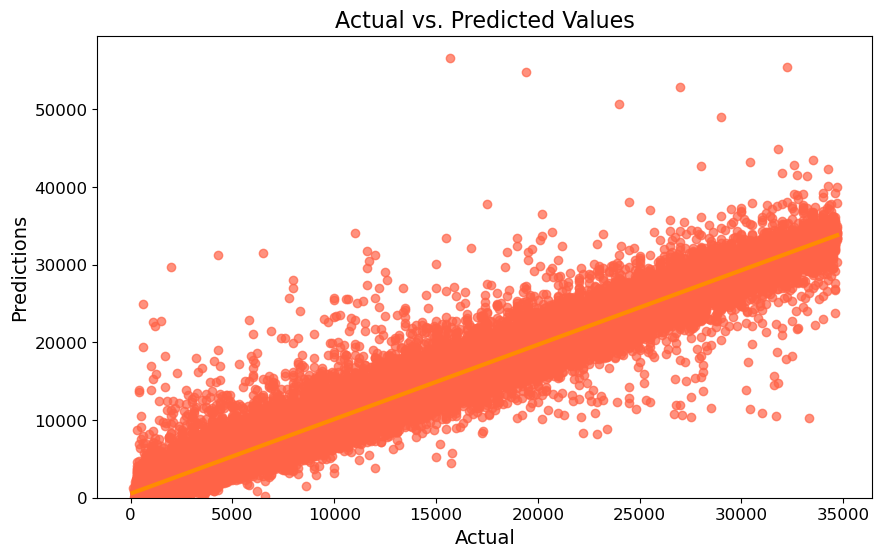

In [80]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='predictions', data=comparison_df1,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h2 style="color: #0000FF;">Todos los Outliers</h2>

In [81]:
def outlier_slayer(data): 
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [82]:
data2 = outlier_slayer(data)

In [83]:
numeric_data2 = data2.select_dtypes(include='number')

In [84]:
X3 = numeric_data2.drop('price', axis=1)  
y3 = numeric_data2['price']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


In [86]:
scaler = MinMaxScaler()
X_train_scaled_outliers = scaler.fit_transform(X_train)
X_test_scaled_outliers = scaler.transform(X_test)

In [87]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled_outliers, y_train)

Ridge()

In [88]:
predictions_ridge2 = ridge_model.predict(X_test_scaled_outliers)

In [89]:
r2_3_2 = r2_score(y_test, predictions_ridge2)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge2, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge2)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge2)

print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.956
RMSE =  1516.1252
The value of the metric MSE is  2298635.6082
MAE =  1010.7009
